In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming you have a 'StateHoliday' column)
df = pd.read_csv('train.csv')
df.head()

<ipython-input-1-3f89735bcbe3>:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0


In [ ]:
import pandas as pd

# Assuming 'Sales' and 'Customers' columns are in the dataset
# Load dataset (if not already loaded)
df = pd.read_csv('train.csv')

# Calculate Pearson correlation coefficient between Sales and Customers
correlation = df[['Sales', 'Customers']].corr()

print("Correlation between Sales and Customers:")
print(correlation)


Correlation between Sales and Customers:
              Sales  Customers
Sales      1.000000   0.892122
Customers  0.892122   1.000000


<ipython-input-2-dc6395819a74>:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


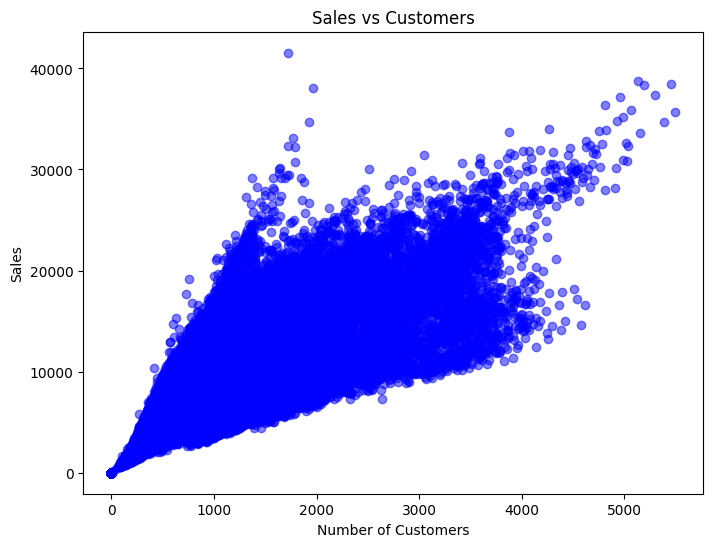

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Sales vs. Customers
plt.figure(figsize=(8, 6))
plt.scatter(df['Customers'], df['Sales'], alpha=0.5, color='blue')
plt.title('Sales vs Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()



In [ ]:
# Create a new column for Sales per Customer
df['SalesPerCustomer'] = df['Sales'] / df['Customers']

# Display the first few rows
df[['Sales', 'Customers', 'SalesPerCustomer']].head()

# Analyze the average sales per customer
avg_sales_per_customer = df['SalesPerCustomer'].mean()
print(f"Average Sales per Customer: {avg_sales_per_customer}")


Average Sales per Customer: 9.624391259290906


   Promo        Sales
0    0.0  4457.755986
1    1.0  8095.151045


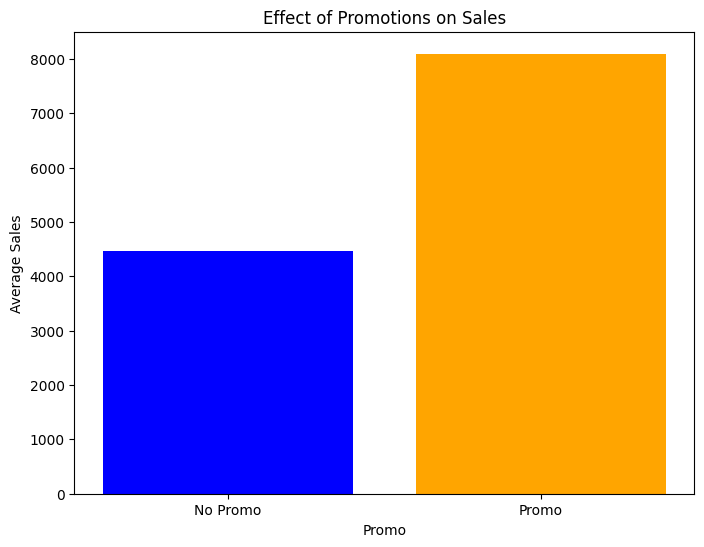

In [ ]:
# Group data by Promo and calculate average sales
promo_sales = df.groupby('Promo')['Sales'].mean().reset_index()

# Display the difference in sales between Promo = 0 and Promo = 1
print(promo_sales)

# Plot the effect of promotion on sales
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(promo_sales['Promo'], promo_sales['Sales'], color=['blue', 'orange'])
plt.title('Effect of Promotions on Sales')
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.show()


   Promo   Customers
0    0.0  518.328325
1    1.0  820.330670


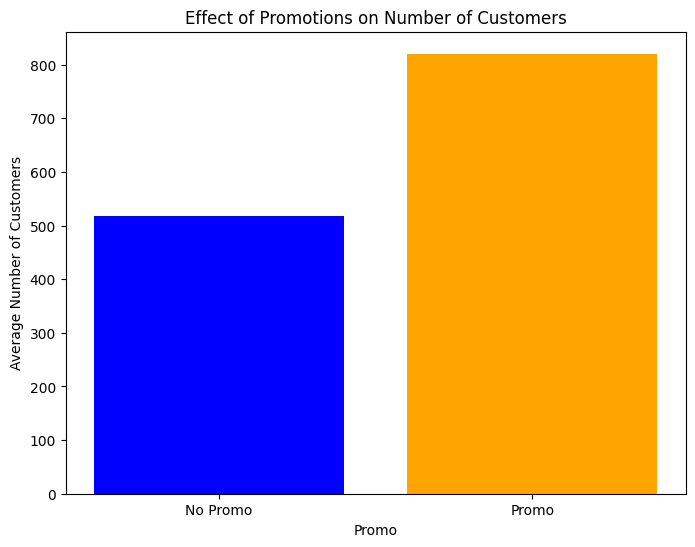

In [ ]:
# Group data by Promo and calculate the average number of customers
promo_customers = df.groupby('Promo')['Customers'].mean().reset_index()

# Display the difference in customers between Promo = 0 and Promo = 1
print(promo_customers)

# Plot the effect of promotion on customers
plt.figure(figsize=(8, 6))
plt.bar(promo_customers['Promo'], promo_customers['Customers'], color=['blue', 'orange'])
plt.title('Effect of Promotions on Number of Customers')
plt.xlabel('Promo')
plt.ylabel('Average Number of Customers')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.show()


In [ ]:
# Load the dataset (assuming it's already loaded as df)
# Calculate average sales during promotional and non-promotional periods
promo_sales = df[df['Promo'] == 1]['Sales'].mean()
non_promo_sales = df[df['Promo'] == 0]['Sales'].mean()

print(f"Average Sales During Promotions: {promo_sales}")
print(f"Average Sales During Non-Promotions: {non_promo_sales}")


Average Sales During Promotions: 8095.151045182089
Average Sales During Non-Promotions: 4457.755985925846


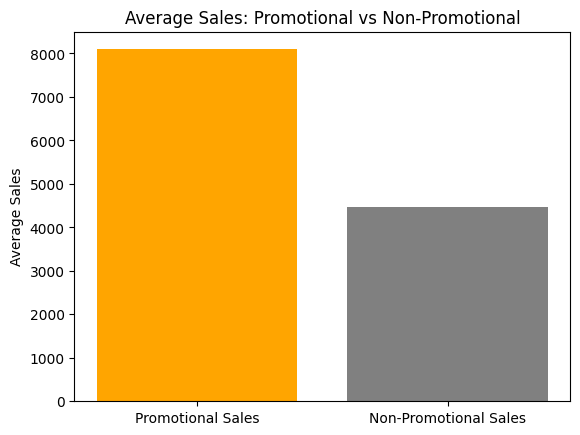

In [ ]:
import matplotlib.pyplot as plt

labels = ['Promotional Sales', 'Non-Promotional Sales']
values = [promo_sales, non_promo_sales]

plt.bar(labels, values, color=['orange', 'gray'])
plt.title('Average Sales: Promotional vs Non-Promotional')
plt.ylabel('Average Sales')
plt.show()


In [ ]:

promo_customers = df[df['Promo'] == 1]['Customers'].mean()
non_promo_customers = df[df['Promo'] == 0]['Customers'].mean()

print(f"Average Customers During Promotions: {promo_customers}")
print(f"Average Customers During Non-Promotions: {non_promo_customers}")


Average Customers During Promotions: 820.3306704276432
Average Customers During Non-Promotions: 518.3283250515366


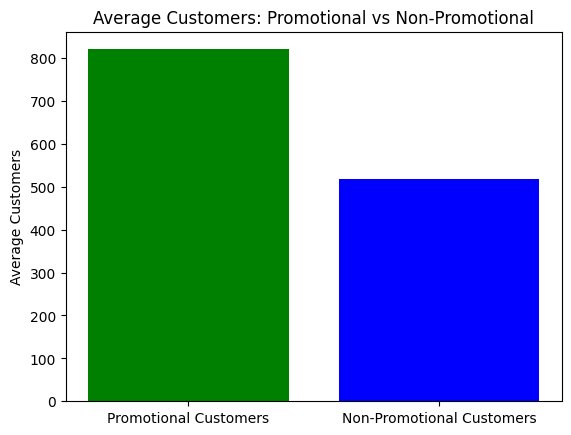

In [ ]:

labels_customers = ['Promotional Customers', 'Non-Promotional Customers']
values_customers = [promo_customers, non_promo_customers]

plt.bar(labels_customers, values_customers, color=['green', 'blue'])
plt.title('Average Customers: Promotional vs Non-Promotional')
plt.ylabel('Average Customers')
plt.show()


In [ ]:
# Calculate average sales per store during promotions and non-promotions
store_sales = df.groupby(['Store', 'Promo'])['Sales'].mean().unstack().fillna(0)
store_sales.columns = ['Non-Promotional Sales', 'Promotional Sales']

print(store_sales)


       Non-Promotional Sales  Promotional Sales
Store                                          
1                3105.307167        5003.205263
2                2855.201365        6186.431579
3                3927.819113        8389.900000
4                6704.300341       10536.063158
5                2547.013652        5918.052632
...                      ...                ...
1111             2854.006849        6080.789474
1112             5471.568493       11186.952632
1113             4431.558219        7432.436842
1114            14736.349315       22120.873684
1115             4429.308219        7616.289474

[1115 rows x 2 columns]


In [ ]:
# Calculate the increase in sales due to promotions for each store
store_sales['Sales Increase'] = store_sales['Promotional Sales'] - store_sales['Non-Promotional Sales']

# Sort stores by sales increase
high_potential_stores = store_sales.sort_values(by='Sales Increase', ascending=False)
print(high_potential_stores)


       Non-Promotional Sales  Promotional Sales  Sales Increase
Store                                                          
817             13317.863014       23474.452632    10156.589618
261              6688.235495       16171.242105     9483.006610
1014             6695.174658       15337.415789     8642.241132
544              7902.671233       16392.757895     8490.086662
963              5769.736301       14226.921053     8457.184751
...                      ...                ...             ...
85               7301.668942        7698.605263      396.936321
262             20846.576792       21139.868421      293.291629
353              6230.808219        6481.742105      250.933886
948              7625.236301        7868.352632      243.116330
274              4580.938567        4361.184211     -219.754356

[1115 rows x 3 columns]


In [ ]:
# Calculate average customers per store during promotions and non-promotions
store_customers = df.groupby(['Store', 'Promo'])['Customers'].mean().unstack().fillna(0)
store_customers.columns = ['Non-Promotional Customers', 'Promotional Customers']

# Combine sales and customers data
store_analysis = pd.concat([store_sales, store_customers], axis=1)
print(store_analysis)


       Non-Promotional Sales  Promotional Sales  Sales Increase  \
Store                                                             
1                3105.307167        5003.205263     1897.898096   
2                2855.201365        6186.431579     3331.230214   
3                3927.819113        8389.900000     4462.080887   
4                6704.300341       10536.063158     3831.762817   
5                2547.013652        5918.052632     3371.038980   
...                      ...                ...             ...   
1111             2854.006849        6080.789474     3226.782624   
1112             5471.568493       11186.952632     5715.384138   
1113             4431.558219        7432.436842     3000.878623   
1114            14736.349315       22120.873684     7384.524369   
1115             4429.308219        7616.289474     3186.981255   

       Non-Promotional Customers  Promotional Customers  
Store                                                    
1           

In [ ]:
# Define a threshold for significant sales increase and customer count
sales_increase_threshold = store_sales['Sales Increase'].quantile(0.75)  # Top 25%
customer_count_threshold = store_customers['Promotional Customers'].quantile(0.75)  # Top 25%

# Filter stores for targeted promotions
targeted_stores = store_analysis[(store_analysis['Sales Increase'] > sales_increase_threshold) &
                                  (store_analysis['Promotional Customers'] > customer_count_threshold)]

print("Targeted Stores for Promotions:")
print(targeted_stores)


Targeted Stores for Promotions:
       Non-Promotional Sales  Promotional Sales  Sales Increase  \
Store                                                             
7                5657.474403       10636.726316     4979.251913   
12               4640.709898        9222.000000     4581.290102   
16               4895.324232        9181.415789     4286.091557   
25               6906.682594       11983.836842     5077.154248   
27               5605.167235       11677.436842     6072.269607   
...                      ...                ...             ...   
1053             5282.551370       10857.936842     5575.385472   
1064             6207.506849       10851.752632     4644.245782   
1089             6761.136986       11347.242105     4586.105119   
1101             6287.821918       11925.657895     5637.835977   
1114            14736.349315       22120.873684     7384.524369   

       Non-Promotional Customers  Promotional Customers  
Store                                 

In [ ]:
#   targeted stores for promotions
print("Targeted Stores for Promotions:")
print(targeted_stores[['Promotional Sales', 'Non-Promotional Sales', 'Sales Increase', 'Promotional Customers']])


Targeted Stores for Promotions:
       Promotional Sales  Non-Promotional Sales  Sales Increase  \
Store                                                             
7           10636.726316            5657.474403     4979.251913   
12           9222.000000            4640.709898     4581.290102   
16           9181.415789            4895.324232     4286.091557   
25          11983.836842            6906.682594     5077.154248   
27          11677.436842            5605.167235     6072.269607   
...                  ...                    ...             ...   
1053        10857.936842            5282.551370     5575.385472   
1064        10851.752632            6207.506849     4644.245782   
1089        11347.242105            6761.136986     4586.105119   
1101        11925.657895            6287.821918     5637.835977   
1114        22120.873684           14736.349315     7384.524369   

       Promotional Customers  
Store                         
7                1058.210526  
12 

In [ ]:

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Group by 'Open' status
open_status_summary = df.groupby('Open')[['Customers', 'Sales', 'SalesPerCustomer']].mean().reset_index()
open_status_summary.columns = ['Open', 'Average Customers', 'Average Sales', 'Average Sales Per Customer']

print(open_status_summary)


   Open  Average Customers  Average Sales  Average Sales Per Customer
0   0.0           0.000000       0.000000                         NaN
1   1.0         771.612213    7131.621332                    9.624391


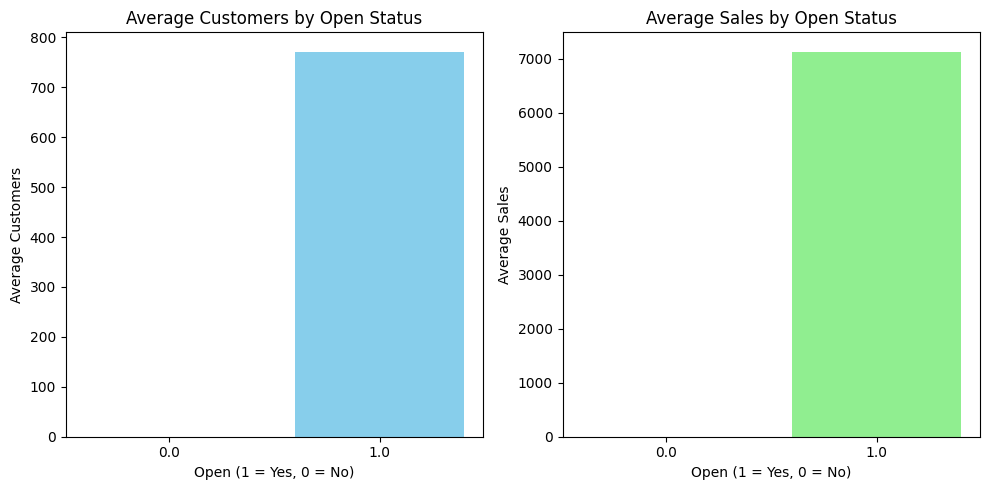

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for average customers and sales when open vs. closed
plt.figure(figsize=(10, 5))

# Average customers
plt.subplot(1, 2, 1)
plt.bar(open_status_summary['Open'].astype(str), open_status_summary['Average Customers'], color='skyblue')
plt.title('Average Customers by Open Status')
plt.xlabel('Open (1 = Yes, 0 = No)')
plt.ylabel('Average Customers')

# Average sales
plt.subplot(1, 2, 2)
plt.bar(open_status_summary['Open'].astype(str), open_status_summary['Average Sales'], color='lightgreen')
plt.title('Average Sales by Open Status')
plt.xlabel('Open (1 = Yes, 0 = No)')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.show()


In [ ]:
# Group by 'DayOfWeek'
day_summary = df.groupby('DayOfWeek')[['Customers', 'Sales']].mean().reset_index()
print(day_summary)


   DayOfWeek   Customers        Sales
0        1.0  809.162729  7889.369954
1        2.0  781.600139  7306.327242
2        3.0  745.848894  6877.055706
3        4.0  694.226199  6297.703508
4        5.0  729.737762  6683.506484
5        6.0  661.605545  5949.004353
6        7.0   38.720656   225.215584


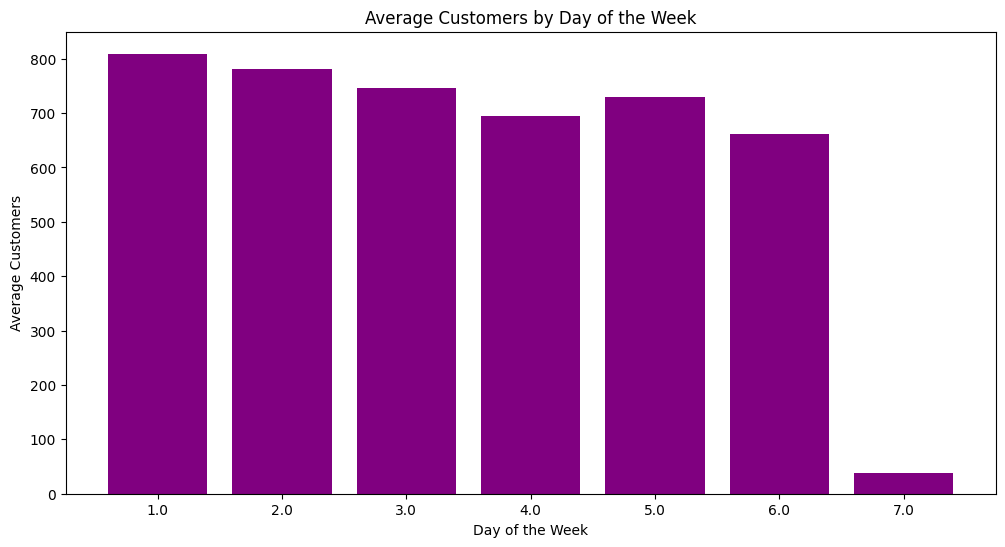

In [ ]:
# Bar plot for average customers by day of the week
plt.figure(figsize=(12, 6))
plt.bar(day_summary['DayOfWeek'].astype(str), day_summary['Customers'], color='purple')
plt.title('Average Customers by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Customers')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Define weekdays as numbers (0-4)
weekdays = [0, 1, 2, 3, 4]

# Filter the dataset for weekdays
weekday_data = df[df['DayOfWeek'].isin(weekdays)]

# Group by 'Store' and check if each store is open every weekday
open_weekdays = weekday_data.groupby('Store')['Open'].sum().reset_index()
open_weekdays['Open All Weekdays'] = open_weekdays['Open'] == 5  # 5 weekdays

# Get stores that are open on all weekdays
stores_open_all_weekdays = open_weekdays[open_weekdays['Open All Weekdays']]
print(stores_open_all_weekdays['Store'])


Series([], Name: Store, dtype: int64)


In [ ]:
# Filter for weekend data (Saturday and Sunday)
weekend_data = df[df['DayOfWeek'].isin([5, 6])]

# Further filter to include only stores open on all weekdays
weekend_sales_open_stores = weekend_data[weekend_data['Store'].isin(stores_open_all_weekdays['Store'])]

# Calculate average sales for these stores on weekends
weekend_sales_summary = weekend_sales_open_stores.groupby('Store')[['Sales', 'Customers']].mean().reset_index()
print(weekend_sales_summary)


Empty DataFrame
Columns: [Store, Sales, Customers]
Index: []


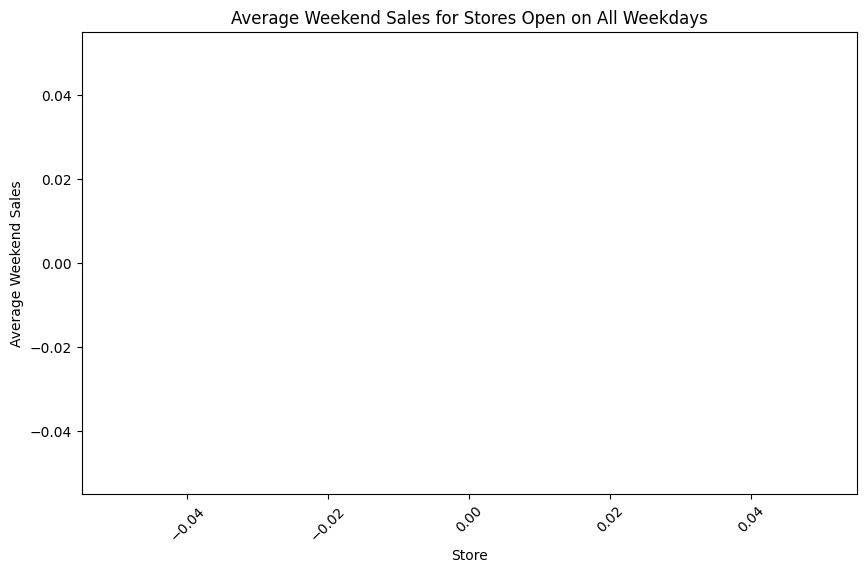

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for average weekend sales
plt.figure(figsize=(10, 6))
plt.bar(weekend_sales_summary['Store'].astype(str), weekend_sales_summary['Sales'], color='purple')
plt.title('Average Weekend Sales for Stores Open on All Weekdays')
plt.xlabel('Store')
plt.ylabel('Average Weekend Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Check unique stores in weekend_data
print("Unique Stores in Weekend Data:")
print(weekend_data['Store'].unique())

# Check unique stores open on all weekdays
print("Unique Stores Open on All Weekdays:")
print(stores_open_all_weekdays['Store'].unique())


Unique Stores in Weekend Data:
[   1    2    3 ... 1113 1114 1115]
Unique Stores Open on All Weekdays:
[]


In [ ]:
 # Print stores open on all weekdays
print("Stores Open on All Weekdays:")
print(stores_open_all_weekdays)

# Check the weekend data
print("Weekend Data:")
print(weekend_data.head())

# Unique store IDs in weekend data
print("Unique Stores in Weekend Data:")
print(weekend_data['Store'].unique())

# Unique store IDs that are open all weekdays
print("Unique Stores Open on All Weekdays:")
print(stores_open_all_weekdays['Store'].unique())

# Check which stores from stores_open_all_weekdays are in weekend_data
matching_stores = weekend_data[weekend_data['Store'].isin(stores_open_all_weekdays['Store'])]
print("Stores in Weekend Data that are Open All Weekdays:")
print(matching_stores)


Stores Open on All Weekdays:
Empty DataFrame
Columns: [Store, Open, Open All Weekdays]
Index: []
Weekend Data:
   Store  DayOfWeek       Date    Sales  Customers  Open  Promo StateHoliday  \
0      1        5.0 2015-07-31   5263.0      555.0   1.0    1.0            0   
1      2        5.0 2015-07-31   6064.0      625.0   1.0    1.0            0   
2      3        5.0 2015-07-31   8314.0      821.0   1.0    1.0            0   
3      4        5.0 2015-07-31  13995.0     1498.0   1.0    1.0            0   
4      5        5.0 2015-07-31   4822.0      559.0   1.0    1.0            0   

   SchoolHoliday  SalesPerCustomer  
0            1.0          9.482883  
1            1.0          9.702400  
2            1.0         10.126675  
3            1.0          9.342457  
4            1.0          8.626118  
Unique Stores in Weekend Data:
[   1    2    3 ... 1113 1114 1115]
Unique Stores Open on All Weekdays:
[]
Stores in Weekend Data that are Open All Weekdays:
Empty DataFrame
Columns: [Sto

In [ ]:
# Define weekdays as numbers (0-4)
weekdays = [0, 1, 2, 3, 4]

# Filter the dataset for weekdays
weekday_data = df[df['DayOfWeek'].isin(weekdays)]

# Group by 'Store' and check if each store is open every weekday
open_weekdays = weekday_data.groupby('Store')['Open'].sum().reset_index()
open_weekdays['Open All Weekdays'] = open_weekdays['Open'] == 5  # Check if open on all 5 weekdays

# Get stores that are open on all weekdays
stores_open_all_weekdays = open_weekdays[open_weekdays['Open All Weekdays']]
print("Stores Open on All Weekdays:")
print(stores_open_all_weekdays)


Stores Open on All Weekdays:
Empty DataFrame
Columns: [Store, Open, Open All Weekdays]
Index: []


In [ ]:
# Check unique values in the 'Open' column
print("Unique Values in 'Open' Column:")
print(df['Open'].unique())


Unique Values in 'Open' Column:
[ 1.  0. nan]


In [ ]:
# Drop rows with missing 'Open' values
df_cleaned = df.dropna(subset=['Open'])

# Alternatively, if you want to fill missing values, you could do:
# df['Open'] = df['Open'].fillna(0)  # Treat missing as closed


In [ ]:
# Define weekdays as numbers (0-4)
weekdays = [0, 1, 2, 3, 4]

# Filter the dataset for weekdays
weekday_data = df_cleaned[df_cleaned['DayOfWeek'].isin(weekdays)]

# Group by 'Store' and check if each store is open every weekday
open_weekdays = weekday_data.groupby('Store')['Open'].sum().reset_index()
open_weekdays['Open All Weekdays'] = open_weekdays['Open'] == 5  # Check if open on all 5 weekdays

# Get stores that are open on all weekdays
stores_open_all_weekdays = open_weekdays[open_weekdays['Open All Weekdays']]
print("Stores Open on All Weekdays:")
print(stores_open_all_weekdays)


Stores Open on All Weekdays:
Empty DataFrame
Columns: [Store, Open, Open All Weekdays]
Index: []


In [ ]:
import pandas as pd

# Load the training dataset (adjust the filename as necessary)
df_train = pd.read_csv('train.csv')

# Now check for missing values in a specific column
column_name = 'Open'  # Replace with your actual column name

# Count missing values in the specified column
missing_values_count = df_train[column_name].isnull().sum()

print(f"Missing values in '{column_name}': {missing_values_count}")


<ipython-input-60-2d94df31250b>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


Missing values in 'Open': 0


In [ ]:
 # Display the column names in the DataFrame
print("Column names in the DataFrame:")
print(df_train.columns)


Column names in the DataFrame:
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


In [ ]:
import pandas as pd

# Load your dataset (if not already loaded)
# df_train = pd.read_csv('train.csv')

# Specify the column to check
column_name = 'Open'  # Replace with your actual column name

# Count occurrences of 1, 0, and NaN values
count_1 = (df_train[column_name] == 1).sum()
count_0 = (df_train[column_name] == 0).sum()
count_nan = df_train[column_name].isnull().sum()

# Display the counts
print(f"Count of 1 in '{column_name}': {count_1}")
print(f"Count of 0 in '{column_name}': {count_0}")
print(f"Count of NaN in '{column_name}': {count_nan}")


Count of 1 in 'Open': 844392
Count of 0 in 'Open': 172817
Count of NaN in 'Open': 0


In [ ]:
# Check unique values in 'Open' column
print("Unique values in 'Open' column:")
print(df_cleaned['Open'].unique())


Unique values in 'Open' column:
[1. 0.]


In [ ]:
# Check unique values in 'DayOfWeek' column
print("Unique values in 'DayOfWeek' column:")
print(df_cleaned['DayOfWeek'].unique())


Unique values in 'DayOfWeek' column:
[5. 4. 3. 2. 1. 7. 6.]


In [ ]:
# Count how many weekdays each store is open
open_weekdays = weekday_data.groupby('Store')['Open'].sum().reset_index()

# Rename for clarity
open_weekdays.columns = ['Store', 'Open Days']

# Get stores that are open for all 5 weekdays
stores_open_all_weekdays = open_weekdays[open_weekdays['Open Days'] == 5]

print("Stores Open on All Weekdays:")
print(stores_open_all_weekdays)


Stores Open on All Weekdays:
Empty DataFrame
Columns: [Store, Open Days]
Index: []


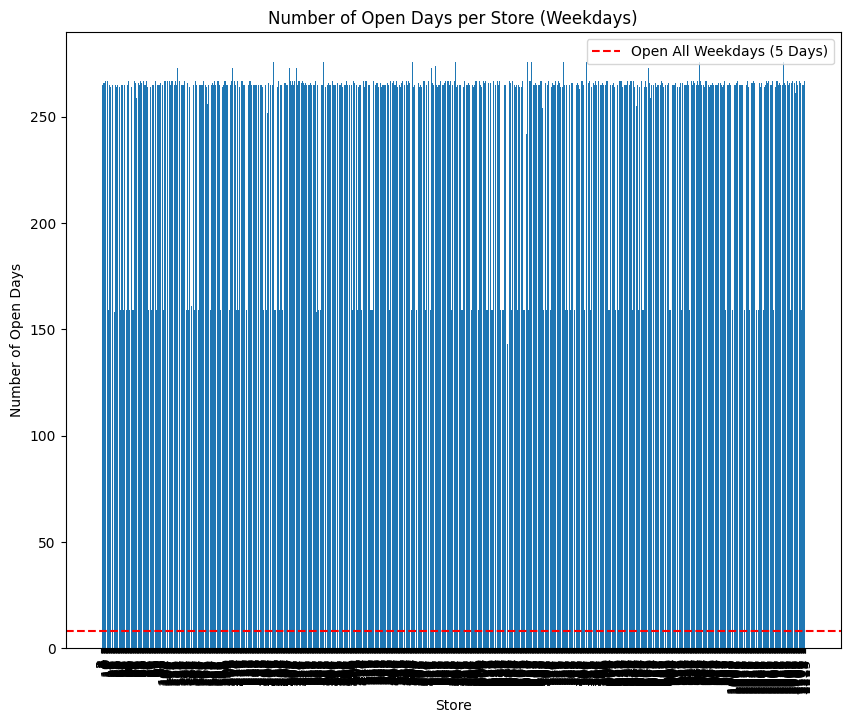

In [ ]:
import matplotlib.pyplot as plt

# Plot the number of open days for each store
plt.figure(figsize=(10, 8))
plt.bar(open_weekdays['Store'].astype(str), open_weekdays['Open Days'])
plt.title('Number of Open Days per Store (Weekdays)')
plt.xlabel('Store')
plt.ylabel('Number of Open Days')
plt.xticks(rotation=90)
plt.axhline(y=8, color='r', linestyle='--', label='Open All Weekdays (5 Days)')
plt.legend()
plt.show()


In [ ]:
# Convert the 'Date' column to datetime format if it isn't already
df_train['Date'] = pd.to_datetime(df_train['Date'])


In [ ]:
# Calculate average sales by number of customers
average_sales_by_customers = df_train.groupby('Customers')['Sales'].mean().reset_index()

# Sort the results for better visualization
average_sales_by_customers = average_sales_by_customers.sort_values(by='Customers')

print("Average Sales by Number of Customers:")
print(average_sales_by_customers)


Average Sales by Number of Customers:
      Customers    Sales
0             0      0.0
1             3      0.0
2             5      0.0
3             8     46.0
4            13    124.0
...         ...      ...
4081       5297  37403.0
4082       5387  34692.0
4083       5458  38484.0
4084       5494  35702.0
4085       7388  27190.0

[4086 rows x 2 columns]


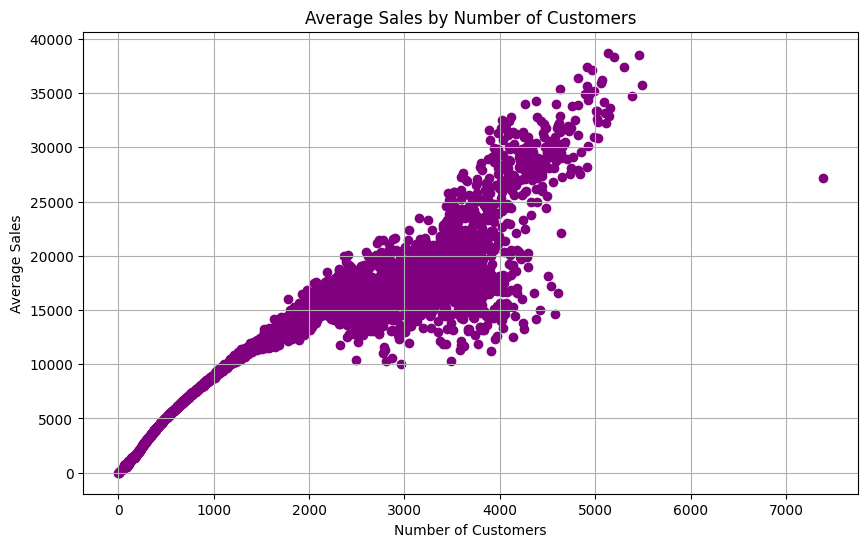

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for average sales by number of customers
plt.figure(figsize=(10, 6))
plt.scatter(average_sales_by_customers['Customers'], average_sales_by_customers['Sales'], color='purple')
plt.title('Average Sales by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Average Sales')
plt.grid()
plt.show()


In [ ]:
# Calculate average sales by Promo status
average_sales_by_promo = df_train.groupby('Promo')['Sales'].mean().reset_index()

# Rename columns for clarity
average_sales_by_promo.columns = ['Promo', 'Average Sales']

print("Average Sales by Promo Status:")
print(average_sales_by_promo)


Average Sales by Promo Status:
   Promo  Average Sales
0      0    4406.050805
1      1    7991.152046


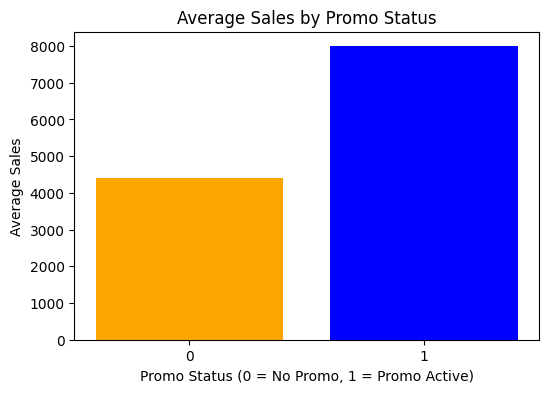

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for average sales by Promo status
plt.figure(figsize=(6, 4))
plt.bar(average_sales_by_promo['Promo'].astype(str), average_sales_by_promo['Average Sales'], color=['orange', 'blue'])
plt.title('Average Sales by Promo Status')
plt.xlabel('Promo Status (0 = No Promo, 1 = Promo Active)')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Calculate average sales by SchoolHoliday and StateHoliday
average_sales_by_holidays = df_train.groupby(['SchoolHoliday', 'StateHoliday'])['Sales'].mean().reset_index()

# Rename columns for clarity
average_sales_by_holidays.columns = ['School Holiday', 'State Holiday', 'Average Sales']

print("Average Sales by School Holiday and State Holiday Status:")
print(average_sales_by_holidays)


Average Sales by School Holiday and State Holiday Status:
   School Holiday State Holiday  Average Sales
0               0             0    5388.054722
1               0             0    5767.922231
2               0             a     332.800996
3               0             b     431.171488
4               1             0    6893.047328
5               1             0    7101.902962
6               1             a     169.065514
7               1             b     197.398808
8               1             c     168.733171


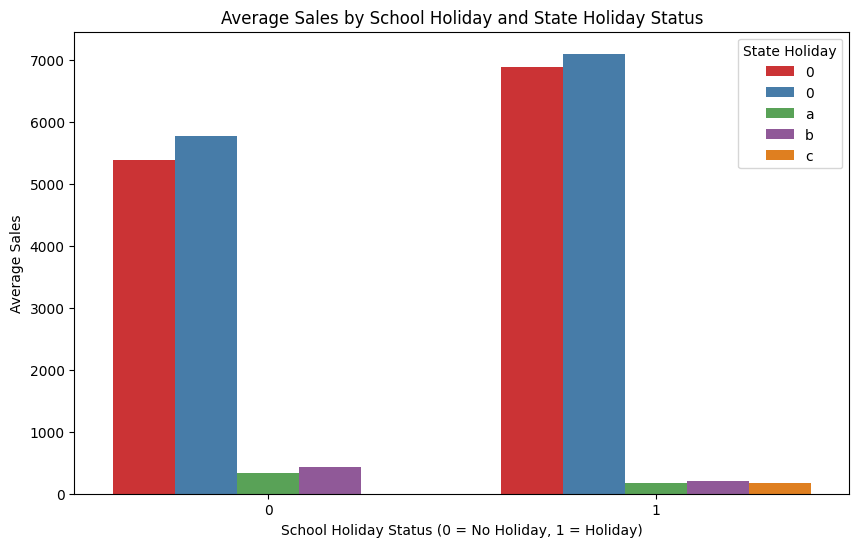

In [ ]:
import seaborn as sns

# Create a bar plot for average sales by SchoolHoliday and StateHoliday
plt.figure(figsize=(10, 6))
sns.barplot(data=average_sales_by_holidays,
            x='School Holiday',
            y='Average Sales',
            hue='State Holiday',
            palette='Set1')
plt.title('Average Sales by School Holiday and State Holiday Status')
plt.xlabel('School Holiday Status (0 = No Holiday, 1 = Holiday)')
plt.ylabel('Average Sales')
plt.legend(title='State Holiday')
plt.xticks(rotation=0)
plt.show()


Average Sales by Store:
      Store         Sales
261     262  20718.515924
816     817  18108.139066
561     562  17969.556263
1113   1114  17200.196391
250     251  15814.087049
...     ...           ...
840     841   2461.395966
207     208   2443.791932
197     198   2407.933121
542     543   2313.468153
306     307   2244.503185

[1115 rows x 2 columns]


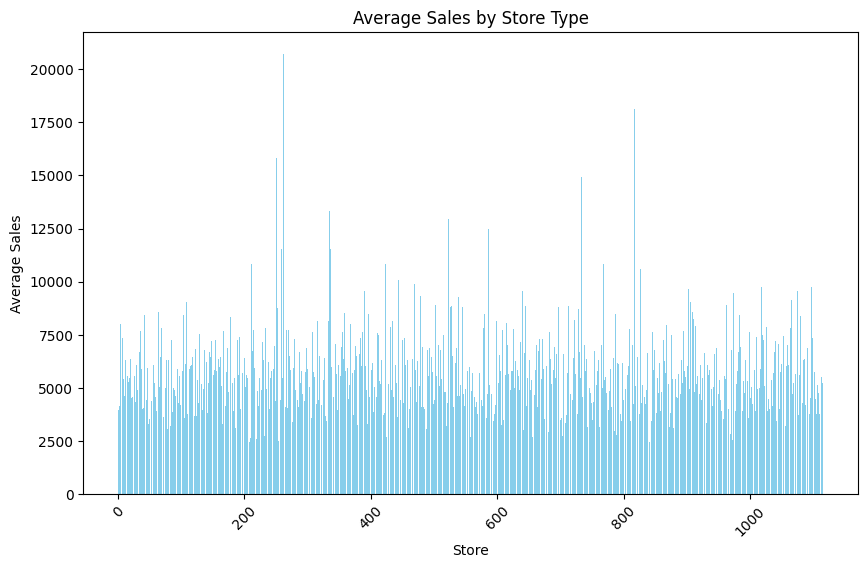

In [ ]:
# Calculate average sales by Store Type
average_sales_by_store_type = df_train.groupby('Store')['Sales'].mean().reset_index()

print("Average Sales by Store:")
print(average_sales_by_store)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(average_sales_by_store_type['Store'], average_sales_by_store_type['Sales'], color='skyblue')
plt.title('Average Sales by Store Type')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Load your dataset (if not already loaded)
df_train = pd.read_csv('store.csv')  # Adjust the path as necessary

# Check the columns of the loaded dataset
print("Columns in the dataset:", df_train.columns)

# Check for the correct column name for CompetitionDistance
if 'CompetitionDistance' in df_train.columns:
    # Create a mask for rows where CompetitionDistance is null
    mask = df_train['CompetitionDistance'].isnull()

    # Filter stores that have both NA and non-null values for CompetitionDistance
    stores_with_changes = df_train[mask].groupby('Store').filter(lambda x: x['CompetitionDistance'].isnull().any() and x['CompetitionDistance'].notnull().any())

    print("Stores with changing Competition Distance:")
    print(stores_with_changes)
else:
    print("Column 'CompetitionDistance' not found in the dataset.")



Columns in the dataset: Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
Stores with changing Competition Distance:
Empty DataFrame
Columns: [Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []


In [ ]:
import pandas as pd

# Load the training dataset
df_train = pd.read_csv('train.csv')  # Adjust the path as necessary
# Load the store dataset containing competitor distance
df_store = pd.read_csv('store.csv')  # Adjust the path as necessary


<ipython-input-117-b598f0e8202c>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')  # Adjust the path as necessary


In [ ]:
# Merge the datasets to include CompetitionDistance
df_merged = df_train.merge(df_store[['Store', 'CompetitionDistance']], on='Store', how='left')


In [ ]:
# Create a mask for rows where CompetitionDistance is null
mask_na = df_merged['CompetitionDistance'].isnull()

# Create a mask for rows where CompetitionDistance is not null
mask_not_na = df_merged['CompetitionDistance'].notnull()

# Group by Store and find those with both NA and not NA in CompetitionDistance
stores_with_changes = df_merged.groupby('Store').filter(
    lambda x: x['CompetitionDistance'].isnull().any() and x['CompetitionDistance'].notnull().any()
)

print("Stores with changing Competition Distance:")
print(stores_with_changes[['Store', 'CompetitionDistance']])


Stores with changing Competition Distance:
Empty DataFrame
Columns: [Store, CompetitionDistance]
Index: []


In [ ]:
# Create a new column to indicate if the competition distance was previously NA
stores_with_changes['Was_NA'] = stores_with_changes['CompetitionDistance'].isnull()

# Calculate average sales based on whether the distance was previously NA or not
average_sales_analysis = stores_with_changes.groupby('Was_NA')['Sales'].mean().reset_index()

print("Average Sales Analysis:")
print(average_sales_analysis)


Average Sales Analysis:
Empty DataFrame
Columns: [Was_NA, Sales]
Index: []


In [ ]:
import pandas as pd

# Load your dataset (replace with your actual file path)
df = pd.read_csv('train.csv')

# Log initial dataset information
logger.info('Initial dataset loaded. Shape: %s', df.shape)

# Check unique values in the 'Open' column
unique_open_values = df['Open'].unique()
logger.info('Unique values in "Open" column: %s', unique_open_values)

# Drop rows with missing 'Open' values
df_cleaned = df.dropna(subset=['Open'])
logger.info('Dropped missing values from "Open" column. New shape: %s', df_cleaned.shape)

# Define weekdays as numbers (0-4)
weekdays = [0, 1, 2, 3, 4]

# Filter the dataset for weekdays
weekday_data = df_cleaned[df_cleaned['DayOfWeek'].isin(weekdays)]
logger.info('Filtered weekday data. Shape: %s', weekday_data.shape)

# Group by 'Store' and check if each store is open every weekday
open_weekdays = weekday_data.groupby('Store')['Open'].sum().reset_index()
open_weekdays['Open All Weekdays'] = open_weekdays['Open'] == 5  # Check if open on all 5 weekdays

# Log stores open all weekdays
stores_open_all_weekdays = open_weekdays[open_weekdays['Open All Weekdays']]
logger.info('Stores open on all weekdays: %s', stores_open_all_weekdays)

# Check weekend data
weekend_data = df_cleaned[df_cleaned['DayOfWeek'].isin([5, 6])]
logger.info('Weekend data shape: %s', weekend_data.shape)

# Analyze weekend sales for stores open on all weekdays
weekend_sales_open_stores = weekend_data[weekend_data['Store'].isin(stores_open_all_weekdays['Store'])]
logger.info('Weekend sales data for stores open on all weekdays: %s', weekend_sales_open_stores)

# Summary of weekend sales
weekend_sales_summary = weekend_sales_open_stores.groupby('Store')[['Sales', 'Customers']].mean().reset_index()
logger.info('Weekend sales summary:\n%s', weekend_sales_summary)


<ipython-input-122-7b93b363028a>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


NameError: name 'logger' is not defined

In [ ]:
# Load your dataset with low_memory option
df = pd.read_csv('train.csv', low_memory=False)


In [ ]:
df = pd.read_csv('train.csv', dtype={'column_name': str})  # Replace 'column_name' with the actual name


<ipython-input-124-957a588db6f2>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv', dtype={'column_name': str})  # Replace 'column_name' with the actual name


In [ ]:
import pandas as pd
import logging

# Configure the logger
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Load your dataset with low_memory option
df = pd.read_csv('train.csv', low_memory=False)

# Log initial dataset information
logger.info('Initial dataset loaded. Shape: %s', df.shape)

# Check unique values in the 'Open' column
unique_open_values = df['Open'].unique()
logger.info('Unique values in "Open" column: %s', unique_open_values)

# Drop rows with missing 'Open' values
df_cleaned = df.dropna(subset=['Open'])
logger.info('Dropped missing values from "Open" column. New shape: %s', df_cleaned.shape)

# Proceed with the rest of your analysis...


In [ ]:
import pandas as pd

# Load the training dataset
df_train = pd.read_csv('train.csv')  # Adjust the path as necessary


<ipython-input-126-a3e20b8c80d9>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')  # Adjust the path as necessary


In [ ]:
# Check for missing values
print(df_train.isnull().sum())

# Example: Filling missing values or dropping them
# df_train['CompetitionDistance'].fillna(df_train['CompetitionDistance'].median(), inplace=True)


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [ ]:
import pandas as pd

# Load the training dataset
df_train = pd.read_csv('train.csv', low_memory=False)  # Adjust the path as necessary

# Convert the 'Date' column to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Specify actual holiday dates
holiday_dates = pd.to_datetime(['2023-12-25', '2024-01-01'])  # Example holiday dates

# Extract features
df_train['Weekday'] = df_train['Date'].dt.weekday  # 0=Monday, 6=Sunday
df_train['Weekend'] = (df_train['Weekday'] >= 5).astype(int)  # 1 if Saturday/Sunday
df_train['Day'] = df_train['Date'].dt.day
df_train['Month'] = df_train['Date'].dt.month
df_train['Year'] = df_train['Date'].dt.year
df_train['Is_Beginning_Month'] = (df_train['Day'] <= 7).astype(int)
df_train['Is_Mid_Month'] = ((df_train['Day'] > 7) & (df_train['Day'] <= 14)).astype(int)
df_train['Is_End_Month'] = (df_train['Day'] > 14).astype(int)

# Calculate days to/from holidays
df_train['Days_To_Holiday'] = df_train['Date'].apply(
    lambda x: (holiday_dates - x).days.min() if (holiday_dates - x).days.min() >= 0 else None
)

df_train['Days_After_Holiday'] = df_train['Date'].apply(
    lambda x: (x - holiday_dates).days.max() if (x - holiday_dates).days.max() > 0 else None
)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the training dataset
df_train = pd.read_csv('train.csv', low_memory=False)

# Convert the 'Date' column to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Specify actual holiday dates
holiday_dates = pd.to_datetime(['2023-12-25', '2024-01-01'])  # Example holiday dates

# Extract features
df_train['Weekday'] = df_train['Date'].dt.weekday  # 0=Monday, 6=Sunday
df_train['Weekend'] = (df_train['Weekday'] >= 5).astype(int)  # 1 if Saturday/Sunday
df_train['Day'] = df_train['Date'].dt.day
df_train['Month'] = df_train['Date'].dt.month
df_train['Year'] = df_train['Date'].dt.year
df_train['Is_Beginning_Month'] = (df_train['Day'] <= 7).astype(int)
df_train['Is_Mid_Month'] = ((df_train['Day'] > 7) & (df_train['Day'] <= 14)).astype(int)
df_train['Is_End_Month'] = (df_train['Day'] > 14).astype(int)

# Calculate days to/from holidays
df_train['Days_To_Holiday'] = df_train['Date'].apply(
    lambda x: (holiday_dates - x).days.min() if (holiday_dates - x).days.min() >= 0 else None
)
df_train['Days_After_Holiday'] = df_train['Date'].apply(
    lambda x: (x - holiday_dates).days.max() if (x - holiday_dates).days.max() > 0 else None
)

# Additional features
df_train['Is_Summer'] = df_train['Month'].isin([6, 7, 8]).astype(int)  # Summer months
df_train['Is_Winter'] = df_train['Month'].isin([12, 1, 2]).astype(int)  # Winter months

# Select features for scaling
features_to_scale = [
    'Weekday', 'Weekend', 'Day', 'Month', 'Year',
    'Days_To_Holiday', 'Days_After_Holiday',
    'Is_Beginning_Month', 'Is_Mid_Month', 'Is_End_Month',
    'Is_Summer', 'Is_Winter'
]

# Scale the data
scaler = StandardScaler()
df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])

# Display the first few rows of the processed dataframe
print(df_train.head())


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday   Weekday  ...       Day     Month      Year  \
0              1  0.501484  ...  1.740766  0.346724  1.502077   
1              1  0.501484  ...  1.740766  0.346724  1.502077   
2              1  0.501484  ...  1.740766  0.346724  1.502077   
3              1  0.501484  ...  1.740766  0.346724  1.502077   
4              1  0.501484  ...  1.740766  0.346724  1.502077   

   Is_Beginning_Month  Is_Mid_Month  Is_End_Month  Days_To_Holiday  \
0           -0.547197     -0.547198      0.924554        -1.734123   


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [ ]:
# Load your dataset (ensure this is cleaned and preprocessed)
df = pd.read_csv('train.csv')

# Define features and target variable
X = df.drop(columns=['Sales'])  # Replace 'Sales' with your target variable name
y = df['Sales']  # Target variable


<ipython-input-133-73f0abeb6fe7>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('regressor', RandomForestRegressor(random_state=42))  # Random Forest Regressor
])


In [ ]:
# Convert 'Date' column into datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful features from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Drop the original 'Date' column
df = df.drop(columns=['Date'])


KeyError: 'Date'

In [ ]:
# Fit the model
pipeline.fit(X_train, y_train)


ValueError: could not convert string to float: '2014-06-22'

In [ ]:
print(df.columns)

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day'],
      dtype='object')


In [ ]:
# Define features and target variable
X = df.drop(columns=['Sales'])  # 'Sales' is the target variable
y = df['Sales']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Build the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('regressor', RandomForestRegressor(random_state=42))  # Random Forest Regressor
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


ValueError: could not convert string to float: 'a'

In [ ]:
df.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,4,5263,555,1,1,0,1,2015,7,31
1,2,4,6064,625,1,1,0,1,2015,7,31
2,3,4,8314,821,1,1,0,1,2015,7,31
3,4,4,13995,1498,1,1,0,1,2015,7,31
4,5,4,4822,559,1,1,0,1,2015,7,31


In [ ]:
pipeline.fit(X_train, y_train)


ValueError: could not convert string to float: 'a'

In [ ]:
# Identify the data types of each column
print(X_train.dtypes)

# Alternatively, check unique values in each column
for column in X_train.columns:
    print(f"{column}: {X_train[column].unique()[:5]}")


Store             int64
DayOfWeek         int32
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
Year              int32
Month             int32
Day               int32
dtype: object
Store: [344 108 299 402 742]
DayOfWeek: [6 4 2 1 3]
Customers: [   0  749  475 1049  717]
Open: [0 1]
Promo: [0 1]
StateHoliday: ['0' 0 'a' 'b' 'c']
SchoolHoliday: [0 1]
Year: [2014 2013 2015]
Month: [ 6 11  9  4  7]
Day: [22 17  6 24 18]


In [ ]:
# One-hot encode categorical columns like 'StateHoliday'
X = pd.get_dummies(X, columns=['StateHoliday'], drop_first=True)

# If other columns contain string data, repeat the process for those columns


In [ ]:
print(X.dtypes)


Store             int64
DayOfWeek         int32
Customers         int64
Open              int64
Promo             int64
SchoolHoliday     int64
Year              int32
Month             int32
Day               int32
StateHoliday_0     bool
StateHoliday_a     bool
StateHoliday_b     bool
StateHoliday_c     bool
dtype: object


In [ ]:
# Redefine features and target
X = df.drop(columns=['Sales'])  # 'Sales' is the target variable
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for Random Forest Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler scales features
    ('regressor', RandomForestRegressor(random_state=42))  # Random Forest Regressor
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


ValueError: could not convert string to float: 'a'

In [ ]:
# Check the data types of the columns in X_train
print(X_train.dtypes)


Store             int64
DayOfWeek         int32
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
Year              int32
Month             int32
Day               int32
dtype: object


In [ ]:
print(X_train['StateHoliday'].unique())


['0' 0 'a' 'b' 'c']


In [ ]:
# One-hot encode the 'StateHoliday' column
X_train = pd.get_dummies(X_train, columns=['StateHoliday'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['StateHoliday'], drop_first=True)

# Align columns to ensure both train and test sets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [ ]:
print(X_train.dtypes)


Store             int64
DayOfWeek         int32
Customers         int64
Open              int64
Promo             int64
SchoolHoliday     int64
Year              int32
Month             int32
Day               int32
StateHoliday_0     bool
StateHoliday_a     bool
StateHoliday_b     bool
StateHoliday_c     bool
dtype: object


In [ ]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 628712.9900977709


In [ ]:
from sklearn.metrics import mean_squared_error
# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 628712.9900977709


In [ ]:
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 792.9142388037757


In [ ]:
# Fit your pipeline (assuming you've already done this)
pipeline.fit(X_train, y_train)

# Get the Random Forest model from the pipeline
rf_model = pipeline.named_steps['randomforestregressor']

# Extract feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


KeyError: 'randomforestregressor'

In [ ]:
# Access the Random Forest model
rf_model = pipeline.named_steps['regressor']


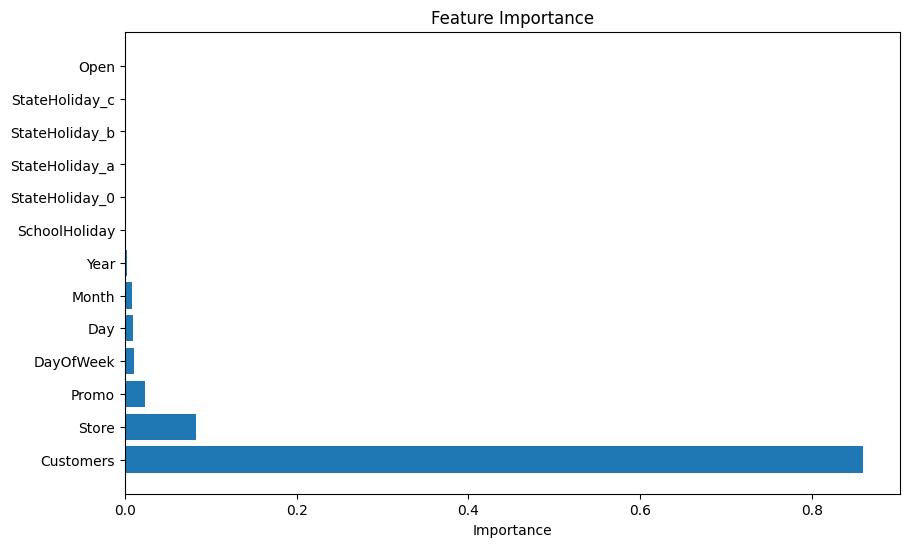

In [ ]:
# Extract feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [ ]:
import pickle
from datetime import datetime


In [ ]:
# Generate a timestamp
timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")

# Define the filename
filename = f"model_{timestamp}.pkl"


In [ ]:
# Save the model
with open(filename, 'wb') as file:
    pickle.dump(pipeline, file)

print(f"Model saved as {filename}")


NameError: name 'filename' is not defined

In [ ]:
import pandas as pd
import pickle
import datetime
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('train.csv')

# Print data types to check for non-numeric columns
print(df.dtypes)

# Convert categorical variables to numeric
X = pd.get_dummies(df[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']], drop_first=True)
y = df['Sales']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the pipeline with your training data
pipeline.fit(X_train, y_train)

# Generate filename with timestamp
timestamp = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
filename = f"model-{timestamp}.pkl"

# Save the model
with open(filename, 'wb') as file:
    pickle.dump(pipeline, file)

print(f"Model saved as {filename}")


<ipython-input-7-268321bd03f9>:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object
Model saved as model-2024-09-23-14-24-40.pkl


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Isolate data for a specific store (e.g., Store 1)
store_data = df[df['Store'] == 1][['Date', 'Sales']]
store_data['Date'] = pd.to_datetime(store_data['Date'])
store_data.set_index('Date', inplace=True)
store_data = store_data.resample('D').sum()  # Resample to daily sales


<ipython-input-8-f379f7686f18>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(store_data['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -4.368104368168497
p-value: 0.0003378834614142451


In [ ]:
if result[1] > 0.05:
    store_data['Sales'] = store_data['Sales'].diff().dropna()


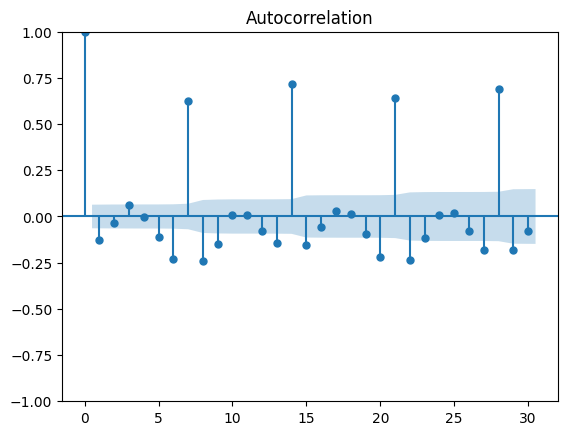

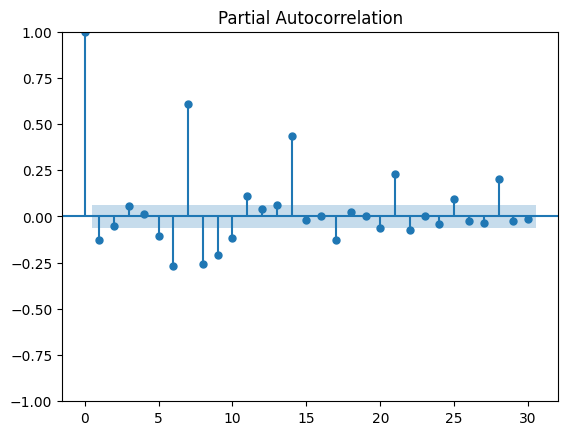

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(store_data['Sales'].dropna())
plt.title('Autocorrelation')
plt.show()

plot_pacf(store_data['Sales'].dropna())
plt.title('Partial Autocorrelation')
plt.show()


In [ ]:
import numpy as np

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare data for supervised learning
time_step = 10  # Adjust this value as needed
data_values = store_data['Sales'].values.reshape(-1, 1)
X, y = create_dataset(data_values, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).reshape(X.shape)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_scaled.shape[1], 1)))
model.add(Dropout(0.2))  # Regularization
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_scaled, y_scaled, epochs=50, batch_size=32)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1859
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1794
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1791
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1817
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1834
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1716
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1653
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1809
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1848
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1760
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1782
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1725
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1739
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1743
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1676
Epoch 16/50
30/

In [ ]:
# Make predictions
predictions = model.predict(X_scaled)

# Inverse the scaling
predicted_sales = scaler.inverse_transform(predictions)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [31]:
import joblib
from sklearn.linear_model import LinearRegression

# Example: Train a model
model = LinearRegression()
# Assume `X_train` and `y_train` are your training data
# model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'model-2024-09-23-14-17-48.pkl')

# Load the model
try:
    loaded_model = joblib.load('model-2024-09-23-14-17-48.pkl')
except EOFError as e:
    print("Error loading the model:", e)


In [ ]:
from flask import Flask, request, jsonify
import joblib  # or use pickle, TensorFlow, or PyTorch, depending on your model
import numpy as np

app = Flask(__name__)

# Load the trained model (adjust path as necessary)
model = joblib.load('model-2024-09-23-14-17-48.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON data from the request
    data = request.get_json(force=True)

    # Prepare the input data (assuming it's an array of features)
    input_data = np.array(data['features']).reshape(1, -1)  # Adjust shape as needed

    # Make prediction
    prediction = model.predict(input_data)

    # Return the prediction as JSON
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
